# ALNX AN108 ad9280 example

In [1]:
import pynq.lib.dma
import numpy as np
from pynq import Overlay
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft
import time

In [2]:
adc = Overlay("./ad9280_dma.bit")

In [3]:
dma = adc.axi_dma_0

In [4]:
adc_sample = adc.ad9280_sample_0

In [5]:
#内存分配
from pynq import Xlnk
xlnk = Xlnk()
adc_buffer = xlnk.cma_array(shape=(1024,), dtype=np.uint8)

<function matplotlib.pyplot.cla>

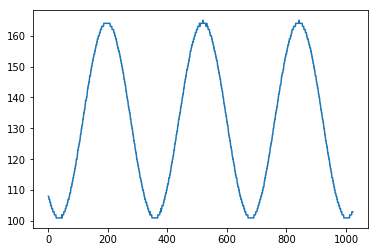

In [6]:
#获取AD采集到的数据并显示
dma.recvchannel.transfer(adc_buffer)
adc_sample.write(0x04, 1024) #sample 1024 points
adc_sample.write(0x00, 0x01) #start sample
dma.recvchannel.wait()
#画图
fig1 = plt.figure()
ax1 = fig1.gca()
plt.plot(adc_buffer)
plt.cla

In [7]:
adc_buffer.close()

In [8]:
xlnk.xlnk_reset()